In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import mdtraj as md
import mcg
import h5py
import pandas as pd
import matplotlib_config as cfg
import fnmatch
from matplotlib import cm

In [2]:
step2us = 2e-9
burst = 1e5

In [3]:
folder = 'data_mu175/'
#folder = 'archive/wrong_wrapping/data_mu180'
gro_folder = 'gro_files'

In [4]:
top_file = os.path.join(gro_folder, 'conf.gro')

data_mu175/run_11/rejected_cv_trial_9.txt
data_mu175/run_11/rejected_cv_trial_1.txt
data_mu175/run_11/rejected_cv_trial_2.txt
data_mu175/run_11/rejected_cv_trial_10.txt
data_mu175/run_11/rejected_cv_trial_8.txt
data_mu175/run_11/rejected_cv_trial_6.txt
data_mu175/run_11/rejected_cv_trial_12.txt
data_mu175/run_11/rejected_cv_trial_13.txt
data_mu175/run_11/rejected_cv_trial_4.txt
data_mu175/run_11/rejected_cv_trial_7.txt
data_mu175/run_5/rejected_cv_trial_11.txt
data_mu175/run_5/rejected_cv_trial_15.txt
data_mu175/run_5/rejected_cv_trial_1.txt
data_mu175/run_5/rejected_cv_trial_2.txt
data_mu175/run_5/rejected_cv_trial_14.txt
data_mu175/run_5/rejected_cv_trial_10.txt
data_mu175/run_5/rejected_cv_trial_8.txt
data_mu175/run_5/rejected_cv_trial_12.txt
data_mu175/run_5/rejected_cv_trial_17.txt
data_mu175/run_5/rejected_cv_trial_13.txt
data_mu175/run_7/rejected_cv_trial_3.txt
data_mu175/run_7/rejected_cv_trial_1.txt
data_mu175/run_7/rejected_cv_trial_6.txt
data_mu175/run_7/rejected_cv_trial_5.

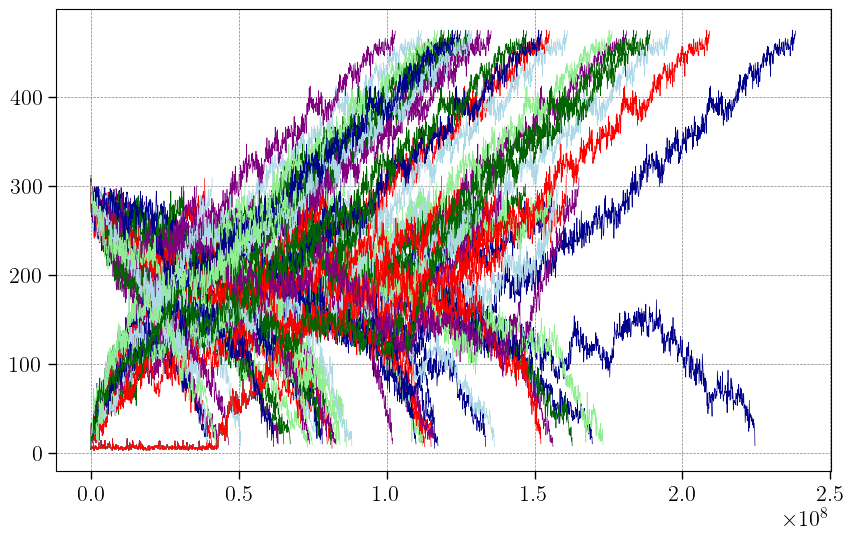

In [5]:
rejected_trajs_mcg = []

for run_folder in os.listdir(folder):
    run_folder_path = os.path.join(folder, run_folder)
    if os.path.isdir(run_folder_path):# and fnmatch.fnmatch(run_folder, 'run3'):
        for trial_file in os.listdir(run_folder_path):
            trial_file_path = os.path.join(run_folder_path, trial_file)
            if os.path.isfile(trial_file_path) and fnmatch.fnmatch(trial_file, 'rejected_cv_trial_*'):
                print(trial_file_path)
                frames, mcg_values = np.loadtxt(trial_file_path, skiprows=1, unpack=True)
                rejected_trajs_mcg.append((frames, mcg_values))
                plt.plot(frames, mcg_values, lw = 0.5)
                #plt.show()

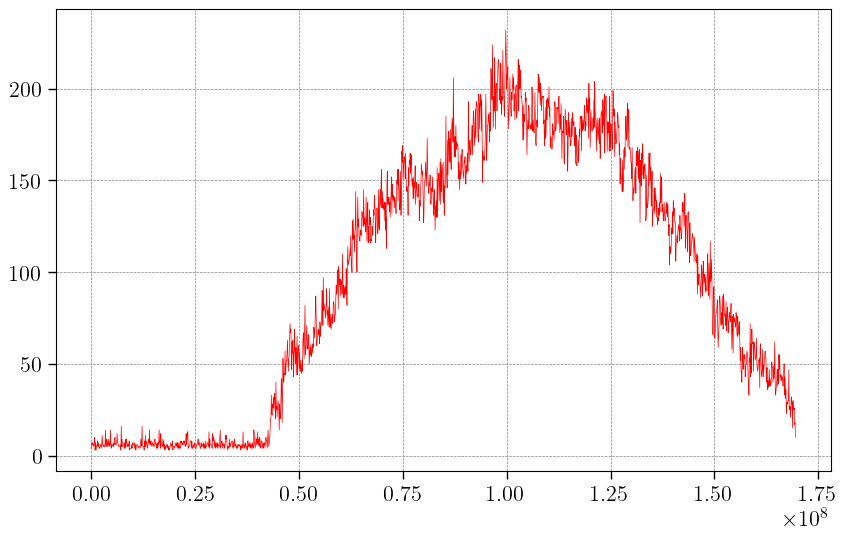

In [6]:
for i in range(2,3):#len(rejected_trajs_mcg)):
    plt.plot(rejected_trajs_mcg[i][0], rejected_trajs_mcg[i][1], lw = 0.5)



In [7]:
successful_trajs_mcg = []

for run_folder in os.listdir(folder):
    run_folder_path = os.path.join(folder, run_folder)
    if os.path.isdir(run_folder_path):
        for trial_file in os.listdir(run_folder_path):
            trial_file_path = os.path.join(run_folder_path, trial_file)
            if os.path.isfile(trial_file_path) and fnmatch.fnmatch(trial_file, 'cv_*'):
                print(trial_file)
                if trial_file.split('_')[-1] != '0.txt':
                    frames, mcg_values = np.loadtxt(trial_file_path, skiprows=1, unpack=True)
                    successful_trajs_mcg.append((frames, mcg_values))

cv_3.txt
cv_1.txt
cv_2.txt
cv_0.txt
cv_3.txt
cv_1.txt
cv_2.txt
cv_7.txt
cv_5.txt
cv_0.txt
cv_4.txt
cv_6.txt
cv_3.txt
cv_1.txt
cv_2.txt
cv_5.txt
cv_0.txt
cv_4.txt
cv_6.txt
cv_3.txt
cv_1.txt
cv_2.txt
cv_7.txt
cv_5.txt
cv_0.txt
cv_4.txt
cv_6.txt
cv_3.txt
cv_1.txt
cv_2.txt
cv_5.txt
cv_0.txt
cv_4.txt
cv_6.txt
cv_3.txt
cv_1.txt
cv_2.txt
cv_0.txt
cv_3.txt
cv_1.txt
cv_2.txt
cv_7.txt
cv_5.txt
cv_0.txt
cv_4.txt
cv_6.txt
cv_3.txt
cv_1.txt
cv_2.txt
cv_5.txt
cv_0.txt
cv_4.txt
cv_6.txt
cv_3.txt
cv_1.txt
cv_2.txt
cv_7.txt
cv_5.txt
cv_0.txt
cv_4.txt
cv_6.txt
cv_1.txt
cv_2.txt
cv_0.txt
cv_3.txt
cv_1.txt
cv_2.txt
cv_7.txt
cv_5.txt
cv_0.txt
cv_4.txt
cv_6.txt
cv_3.txt
cv_1.txt
cv_8.txt
cv_2.txt
cv_7.txt
cv_5.txt
cv_0.txt
cv_4.txt
cv_6.txt


499.78


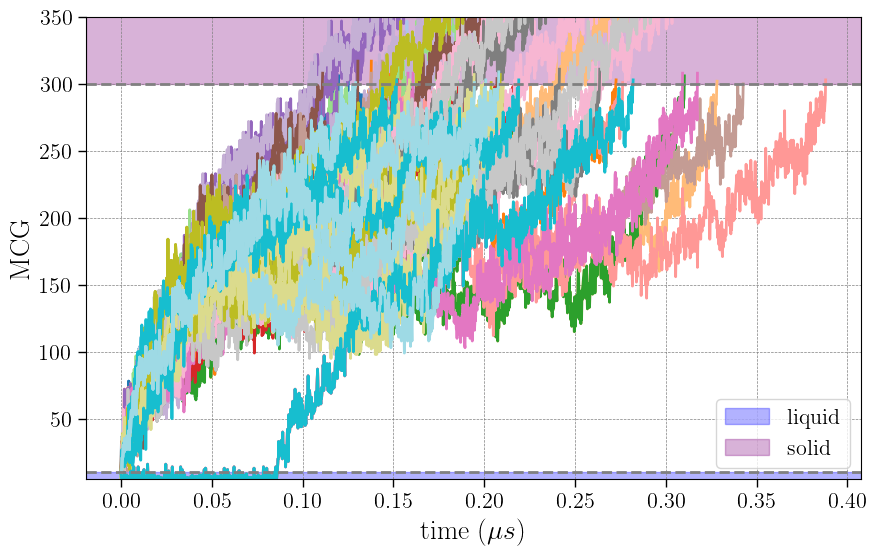

In [8]:
n = len(successful_trajs_mcg)
colors = cm.tab20(np.linspace(0, 1, n))

for i in range(n):
    traj = successful_trajs_mcg[i]
    plt.plot(traj[0] * step2us, traj[1], color=colors[i])


# Fill below y=10
plt.axhspan(ymin=plt.ylim()[0], ymax=10, color='blue', alpha=0.3, label = 'liquid')
print(plt.ylim()[1])
# Fill above y=300
plt.axhspan(ymin=300, ymax=plt.ylim()[1], color='purple', alpha=0.3, label = 'solid')

plt.axhline(10, color='gray', linestyle='--')
plt.axhline(300, color='gray', linestyle='--')

plt.ylim(5, 350)
plt.legend()

plt.xlabel('time ($\mu s$)')
plt.ylabel('MCG')
plt.savefig('successful_trials.png')
plt.show()

In [9]:
logfile_init = os.path.join(folder, 'run3/log.txt')

In [10]:
df = pd.DataFrame()
all_dfs = []  # Collect all pieces here

for run_folder in os.listdir(folder):
    run_folder_path = os.path.join(folder, run_folder)
    if os.path.isdir(run_folder_path) and fnmatch.fnmatch(run_folder, 'run*'):
        logfile_path = os.path.join(run_folder_path, 'log.txt')
        weights = np.load(os.path.join(run_folder_path, 'trajectory_weights.npy'))[1:]

        # Load the log file
        temp_df = pd.read_fwf(
            logfile_path,
            header=0,
            widths=[21] * 7,
            strip=True
        )
        temp_df.columns = temp_df.columns.str.strip()

        # Initialize weights column with zeros
        temp_df['Weights'] = 0.0

        # Get successful rows
        successful_indices = temp_df[temp_df['Successful'] == True].index

        # Sanity check
        assert len(successful_indices) == len(weights), "Mismatch between successful trajectories and weights"

        # Assign weights to successful trajectories
        for idx, weight in zip(successful_indices, weights):
            temp_df.at[idx, 'Weights'] = weight

        all_dfs.append(temp_df)

# Concatenate everything after processing
df = pd.concat(all_dfs, ignore_index=True)


In [11]:
df

,Trial,Index,Successful,SP frame on old traj,SP frame on new traj,Full Path Length,Shooting Direction,Weights
0,1,1,False,93200000,74300000,1812,-1,0.0
1,2,1,False,107100000,107100000,1696,1,0.0
2,3,1,True,87000000,24800000,1379,-1,2.0
3,4,2,False,31300000,31300000,1380,1,0.0
4,5,2,True,33600000,33600000,600,1,6.0
...,...,...,...,...,...,...,...,...
166,10,6,False,89600000,26600000,411,-1,0.0
167,11,6,False,49300000,70400000,1252,-1,0.0
168,12,6,True,30400000,30400000,647,1,1.0
169,13,7,True,32300000,32300000,1005,1,1.0


In [12]:
forward_trajs = df[df['Shooting Direction'] == 1]

# Calculate:
# - Total number of forward trajectories
total_forward = len(forward_trajs)

# - Number of successful forward trajectories
successful_forward = forward_trajs['Successful'].sum()  # True=1, False=0

# Calculate percentage
percentage_successful = (successful_forward / total_forward) * 100

print(f"Percentage of forward paths that are successful: {percentage_successful:.2f}%")

Percentage of forward paths that are successful: 37.80%


In [13]:
successful_trajs = df[df['Successful'] == True]

# Calculate:
# - Total number of successful trajectories
total_successful = len(successful_trajs)

# - Number of successful forward trajectories (direction == 1)
successful_forward = successful_trajs[successful_trajs['Shooting Direction'] == 1].shape[0]

# Calculate percentage
percentage_forward = (successful_forward / total_successful) * 100 if total_successful > 0 else 0

print(f"Percentage of successful paths that are forward: {percentage_forward:.2f}%")

Percentage of successful paths that are forward: 44.93%


In [14]:
print(len(df))

171


In [15]:
print(len(successful_trajs))

69


In [16]:
len(df["Successful"])

171

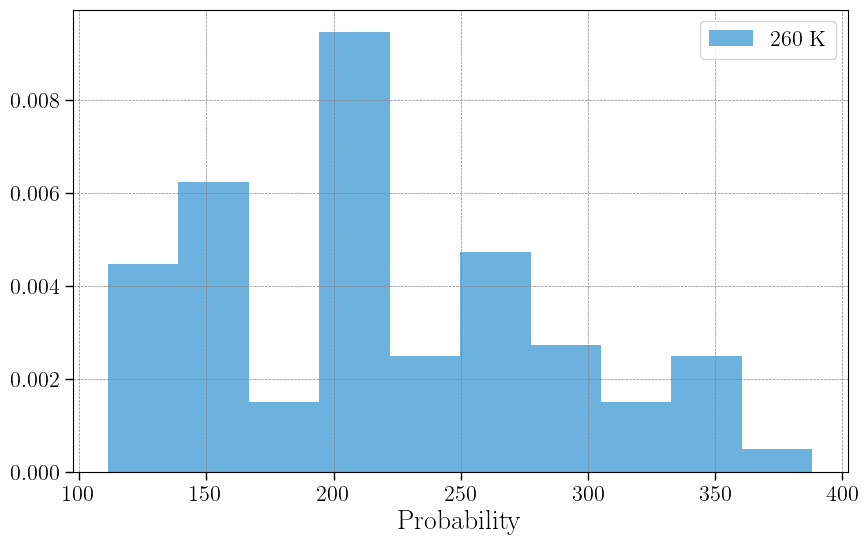

In [17]:
lengths_weighted = []

for length, weight in zip(df['Full Path Length'], df['Weights']):
    lengths_weighted.extend([length] * int(weight))

lengths_weighted = np.array(lengths_weighted)

time_weighted = lengths_weighted * 1e5 * 2e-6

plt.hist(time_weighted, density = True, label="260 K", color = cfg.colors['lightblue'])
plt.legend()
plt.xlabel('Path Length (ns)')
plt.xlabel('Probability')
plt.savefig('path_lengths.png')

In [18]:
successful_trajs

,Trial,Index,Successful,SP frame on old traj,SP frame on new traj,Full Path Length,Shooting Direction,Weights
2,3,1,True,87000000,24800000,1379,-1,2.0
4,5,2,True,33600000,33600000,600,1,6.0
10,11,3,True,32100000,32100000,627,1,3.0
15,3,1,True,88200000,23100000,1350,-1,1.0
16,4,2,True,26900000,21000000,1291,-1,1.0
...,...,...,...,...,...,...,...,...
162,6,4,True,29700000,29700000,974,1,1.0
163,7,5,True,51400000,51400000,1041,1,5.0
168,12,6,True,30400000,30400000,647,1,1.0
169,13,7,True,32300000,32300000,1005,1,1.0


In [19]:
sp_idx = successful_trajs['SP frame on new traj']

499.78


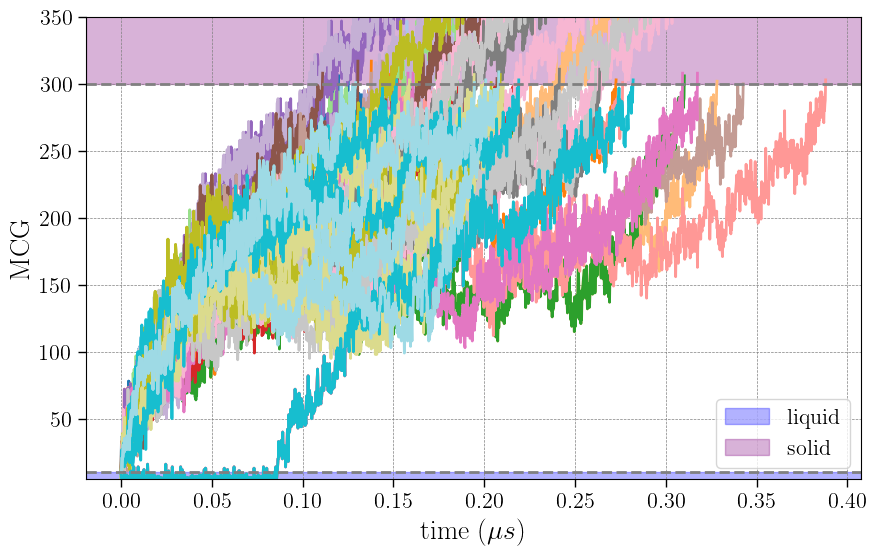

In [20]:
n = len(successful_trajs_mcg)
colors = cm.tab20(np.linspace(0, 1, n))

for i in range(n):
    traj = successful_trajs_mcg[i]
    plt.plot(traj[0] * step2us, traj[1], color=colors[i])


# Fill below y=10
plt.axhspan(ymin=plt.ylim()[0], ymax=10, color='blue', alpha=0.3, label = 'liquid')
print(plt.ylim()[1])
# Fill above y=300
plt.axhspan(ymin=300, ymax=plt.ylim()[1], color='purple', alpha=0.3, label = 'solid')

plt.axhline(10, color='gray', linestyle='--')
plt.axhline(300, color='gray', linestyle='--')

plt.ylim(5, 350)
plt.legend()

plt.xlabel('time ($\mu s$)')
plt.ylabel('MCG')
plt.savefig('successful_trials.png')
plt.show()

In [21]:
def build_pd(run_folder_path):
    logfile_path = os.path.join(run_folder_path, 'log.txt')
    weights = np.load(os.path.join(run_folder_path, 'trajectory_weights.npy'))[1:]
    
    # Load the log file
    df = pd.read_fwf(
        logfile_path,
        header=0,
        widths=[21] * 7,
        strip=True
    )
    df.columns = df.columns.str.strip()
    
    # Initialize weights column with zeros
    df['Weights'] = 0.0
    
    # Get successful rows
    successful_indices = df[df['Successful'] == True].index
    
    # Sanity check
    assert len(successful_indices) == len(weights), "Mismatch between successful trajectories and weights"
    
    # Assign weights to successful trajectories
    for idx, weight in zip(successful_indices, weights):
        df.at[idx, 'Weights'] = weight

    return df

In [22]:

# Dictionary to store all run data
run_data = {}

for run_folder in os.listdir(folder):
    run_folder_path = os.path.join(folder, run_folder)
    
    # Skip non-directories and hidden folders
    if not os.path.isdir(run_folder_path) or run_folder.startswith('.'):
        continue
        
    # Initialize entry for this run
    run_data[run_folder] = {
        'log': None,          # Will store the log DataFrame
        'index_succ': {},          # Will store trial trajectories
        'trial_rej': {}
    }
    
    df = build_pd(run_folder_path)

    run_data[run_folder]['log'] = df
    # Clean column names
    
    # Process trajectory files
    for succ_file in os.listdir(run_folder_path):
        if succ_file.startswith('cv_') and not succ_file.endswith('_0.txt'):
            try:
                trial_num = int(succ_file.split('_')[1].split('.')[0])
                trial_path = os.path.join(run_folder_path, succ_file)
                frames, mcg_values = np.loadtxt(trial_path, skiprows=1, unpack=True)
                
                run_data[run_folder]['index_succ'][trial_num] = {
                    'frames': frames,
                    'mcg_values': mcg_values
                }
            except (ValueError, IndexError) as e:
                print(f"Error processing {succ_file} in {run_folder}: {e}")
                continue
    # Process trajectory files
    for rej_file in os.listdir(run_folder_path):
        if rej_file.startswith('rejected_cv_trial_') and not rej_file.endswith('_0.txt'):
            try:
                trial_num = int(rej_file.split('_')[3].split('.')[0])
                trial_path = os.path.join(run_folder_path, rej_file)
                frames, mcg_values = np.loadtxt(trial_path, skiprows=1, unpack=True)
                
                run_data[run_folder]['trial_rej'][trial_num] = {
                    'frames': frames,
                    'mcg_values': mcg_values
                }
            except (ValueError, IndexError) as e:
                print(f"Error processing {rej_file} in {run_folder}: {e}")
                continue

499.78


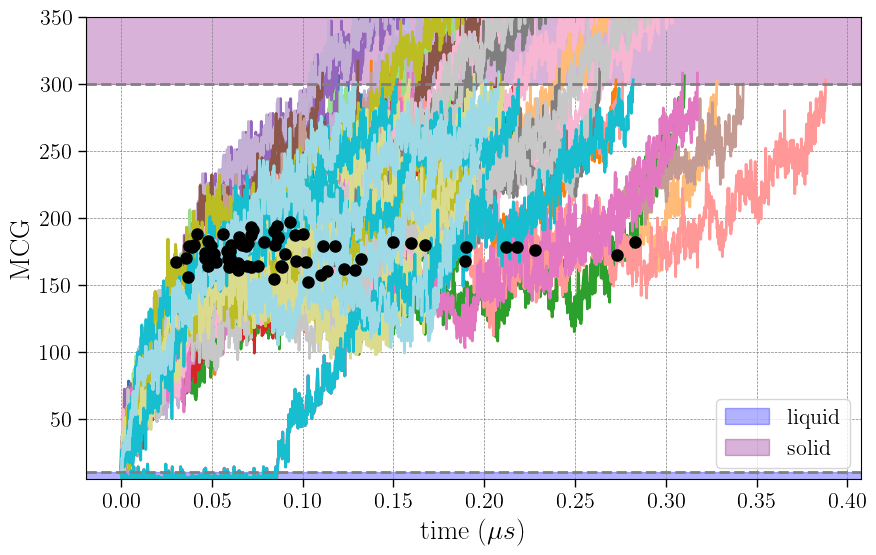

In [48]:
sp_cv_list_succ = []

colors_mpl = cm.tab20(np.linspace(0, 1, n))
c = 0

for run in run_data:
    df = run_data[run]['log']
    successful_df = df[df['Successful'] == True]

    #print(successful_df)

    for idx in run_data[run]['index_succ'].keys():


        sp_idx = successful_df[successful_df['Index'] == idx]['SP frame on new traj'].values[0]
        
        frames = run_data[run]['index_succ'][idx]['frames']
        mcg_values = run_data[run]['index_succ'][idx]['mcg_values']

        sp_cv = mcg_values[int( sp_idx / burst )]

        sp_cv_list_succ.append(sp_cv)

        plt.plot(frames * step2us, mcg_values, color=colors_mpl[c])
        plt.scatter(sp_idx * step2us, sp_cv, zorder = 100, c = 'black')
        c += 1

# Fill below y=10
plt.axhspan(ymin=plt.ylim()[0], ymax=10, color='blue', alpha=0.3, label = 'liquid')
print(plt.ylim()[1])
# Fill above y=300
plt.axhspan(ymin=300, ymax=plt.ylim()[1], color='purple', alpha=0.3, label = 'solid')

plt.axhline(10, color='gray', linestyle='--')
plt.axhline(300, color='gray', linestyle='--')

plt.ylim(5, 350)
plt.legend()

plt.xlabel('time ($\mu s$)')
plt.ylabel('MCG')

plt.show()

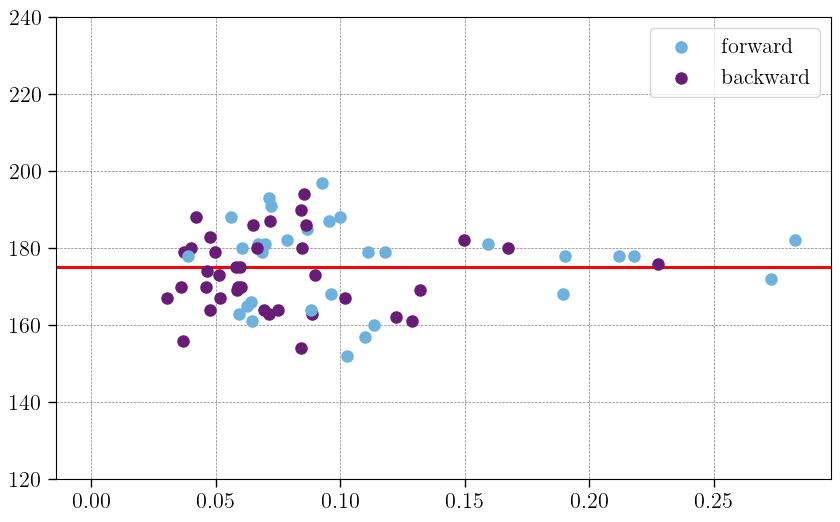

In [36]:
sp_cv_list_succ = []

sp_fw_succ = []
sp_bw_succ = []

for run in run_data:
    df = run_data[run]['log']
    successful_df = df[df['Successful'] == True]

    #print(successful_df)

    for idx in run_data[run]['index_succ'].keys():

        #print(f'IDX:  {idx}')

        row = successful_df[successful_df['Index'] == idx]

        sp_idx = row['SP frame on new traj'].values[0]
        direction = row['Shooting Direction'].values[0]
        
        frames = run_data[run]['index_succ'][idx]['frames']
        mcg_values = run_data[run]['index_succ'][idx]['mcg_values']

        sp_cv = mcg_values[int( sp_idx / burst )]

        sp_cv_list_succ.append(sp_cv)

        if direction == 1:
            color = cfg.colors['lightblue']
            sp_fw_succ.append(sp_cv)
        elif direction == -1:
            color = cfg.colors['purple']
            sp_bw_succ.append(sp_cv)

        
        #plt.plot(frames * step2us, mcg_values)
        plt.scatter(sp_idx * step2us, sp_cv, zorder = 100, color = color)
        plt.ylim(120,240)
        plt.axhline(175)

plt.scatter(0,0, label = 'forward', color = cfg.colors['lightblue'])
plt.scatter(0,0, label = 'backward', color = cfg.colors['purple'])

plt.legend()
plt.show()

(array([0.00837359, 0.00837359, 0.01674718, 0.03349436, 0.03349436,
        0.02093398, 0.02512077, 0.03768116, 0.05024155, 0.01256039,
        0.02512077, 0.00837359, 0.00837359]),
 array([152.        , 155.46153846, 158.92307692, 162.38461538,
        165.84615385, 169.30769231, 172.76923077, 176.23076923,
        179.69230769, 183.15384615, 186.61538462, 190.07692308,
        193.53846154, 197.        ]),
 <BarContainer object of 13 artists>)

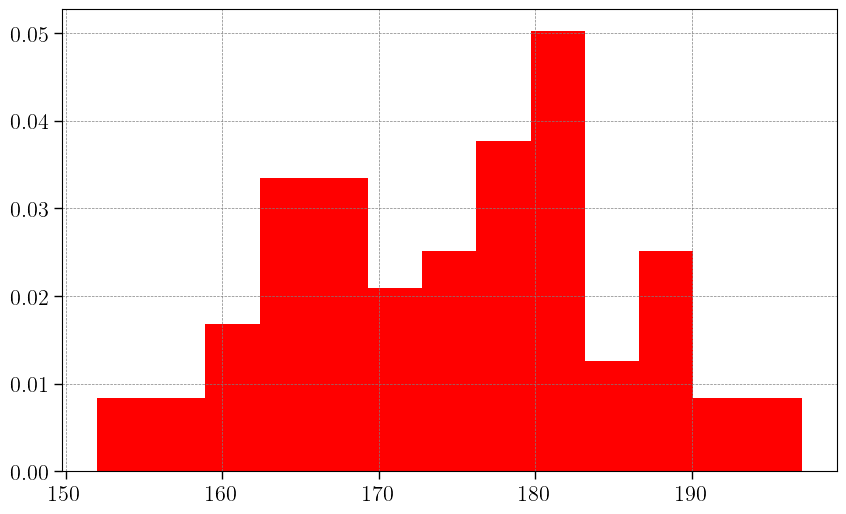

In [25]:
plt.hist(sp_cv_list_succ, density = True, bins = 13)

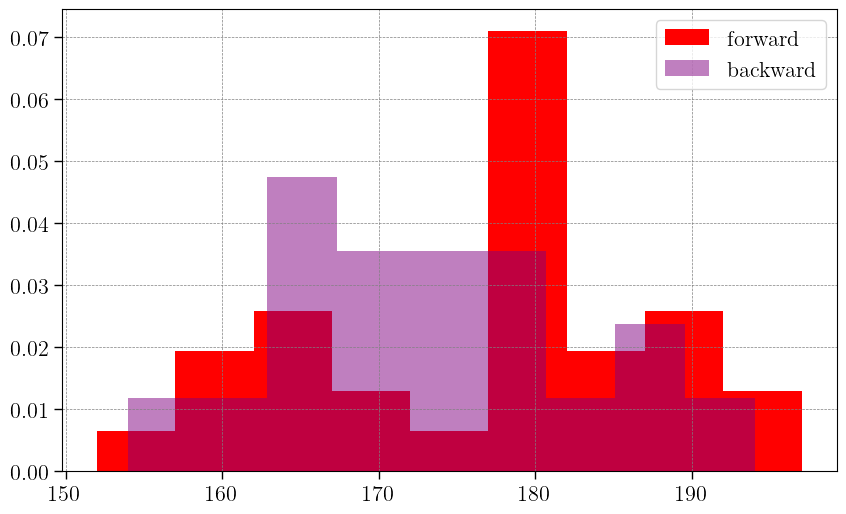

In [26]:
plt.hist(sp_fw_succ, density = True, bins = 9, label = 'forward')
plt.hist(sp_bw_succ, density = True, bins = 9, alpha = 0.5, label = 'backward')
plt.legend()

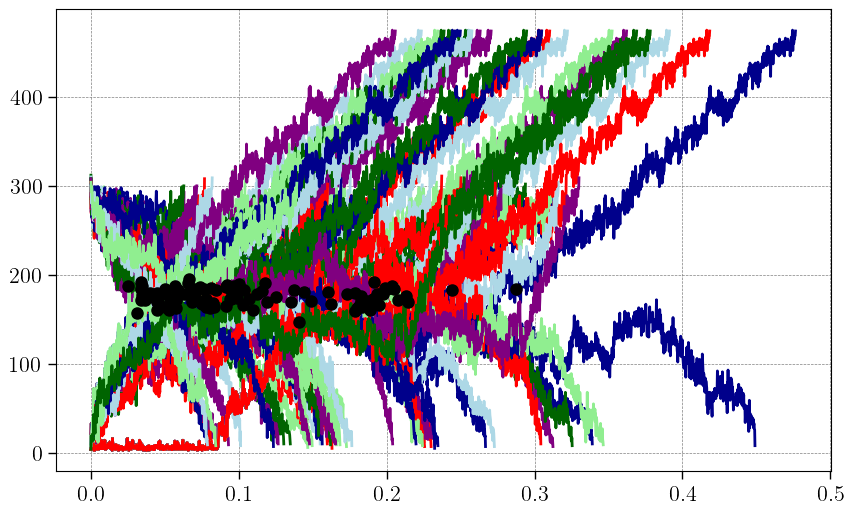

In [27]:
sp_cv_list_rej = []

for run in run_data:
    df = run_data[run]['log']

    #print(df)

    for idx in run_data[run]['trial_rej'].keys():


        sp_idx = df[df['Trial'] == idx]['SP frame on new traj'].values[0]
        
        frames = run_data[run]['trial_rej'][idx]['frames']
        mcg_values = run_data[run]['trial_rej'][idx]['mcg_values']

        sp_cv = mcg_values[int( sp_idx / burst )]

        sp_cv_list_rej.append(sp_cv)

        
        plt.plot(frames * step2us, mcg_values)
        plt.scatter(sp_idx * step2us, sp_cv, zorder = 100, c = 'black')

plt.show()

(array([0.00265523, 0.        , 0.00265523, 0.01327614, 0.02389706,
        0.02920752, 0.03186275, 0.03186275, 0.03982843, 0.03186275,
        0.03451797, 0.02124183, 0.00796569]),
 array([147.        , 150.69230769, 154.38461538, 158.07692308,
        161.76923077, 165.46153846, 169.15384615, 172.84615385,
        176.53846154, 180.23076923, 183.92307692, 187.61538462,
        191.30769231, 195.        ]),
 <BarContainer object of 13 artists>)

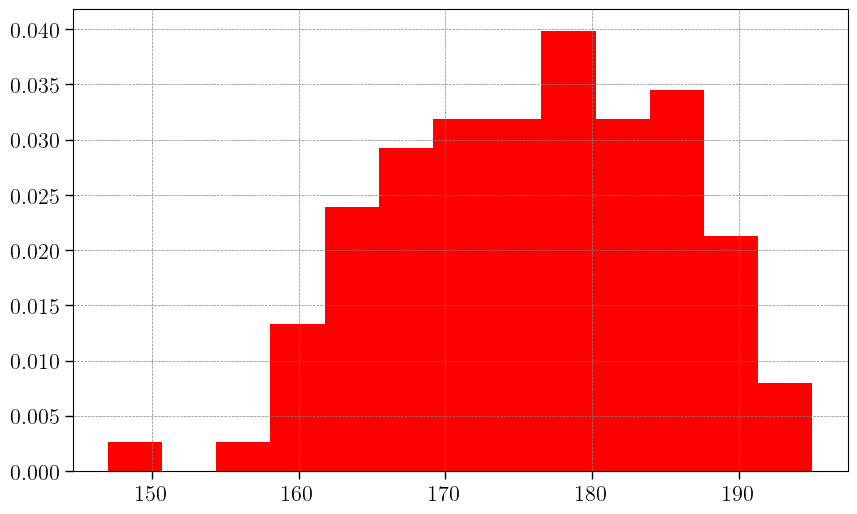

In [28]:
plt.hist(sp_cv_list_rej, density = True, bins = 13)

In [29]:
sp_cv_list = sp_cv_list_succ + sp_cv_list_rej

(array([0.00128655, 0.00385965, 0.0077193 , 0.02830409, 0.02444444,
        0.03602339, 0.02444444, 0.04631579, 0.02315789, 0.01929825,
        0.0051462 ]),
 array([147.        , 151.54545455, 156.09090909, 160.63636364,
        165.18181818, 169.72727273, 174.27272727, 178.81818182,
        183.36363636, 187.90909091, 192.45454545, 197.        ]),
 <BarContainer object of 11 artists>)

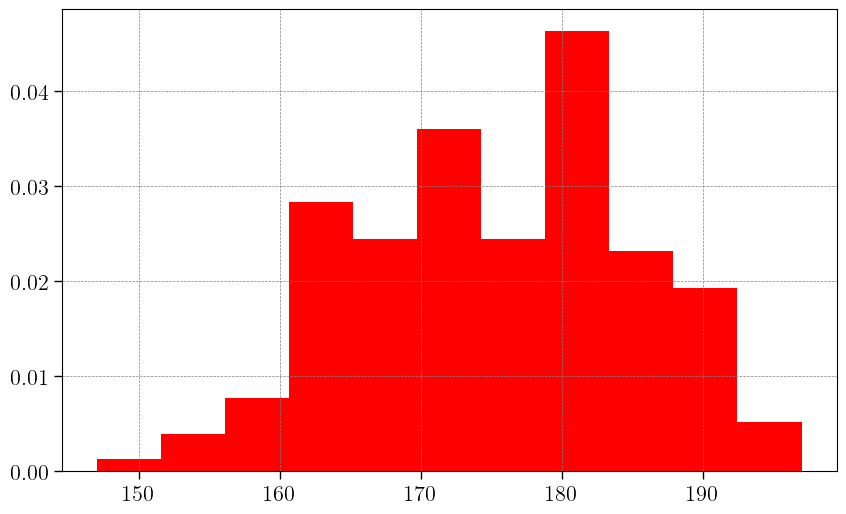

In [30]:
plt.hist(sp_cv_list, density = True, bins = 11)